In [0]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model


Using TensorFlow backend.


In [0]:
uploaded = files.upload()

Saving USIM5.SA-D.csv to USIM5.SA-D (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['USIM5.SA-D.csv']))
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,2.17778,2.18000,2.12222,2.13333,1.884573,571500
1,2000-01-04,2.11111,2.11111,2.05556,2.05556,1.815871,1121400
2,2000-01-05,2.06667,2.25556,2.05556,2.25111,1.988619,1602450
3,2000-01-06,2.22222,2.45556,2.22222,2.45556,2.169229,3084300
4,2000-01-07,2.45556,2.57778,2.44444,2.55333,2.255598,2871000
5,2000-01-10,2.60000,2.88889,2.60000,2.81778,2.489212,4137750
6,2000-01-11,2.77778,2.86667,2.60000,2.66667,2.355722,3211650
7,2000-01-12,2.65333,2.65333,2.48889,2.53556,2.239900,4891050
8,2000-01-13,2.57778,2.62222,2.35556,2.44444,2.159405,1505250
9,2000-01-14,2.44444,2.48889,2.36667,2.48889,2.198672,2822400


In [0]:
'Linhas: {} | Colunas: {}'.format(df.shape[0], df.shape[1])

'Linhas: 4689 | Colunas: 7'

In [0]:
list(df)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('USIM5.SA-D.csv', parse_dates=['Date'], date_parser=dateparse)

<function matplotlib.pyplot.grid>

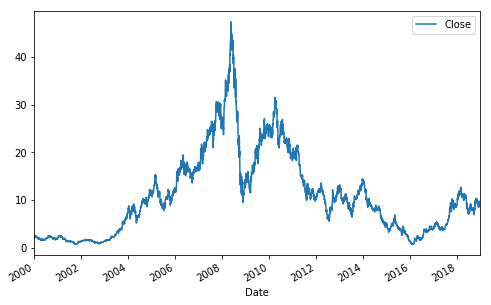

In [0]:
data.plot(x='Date', y='Close', figsize=(8, 5))
plt.grid

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if (end_ix > len(sequence) - 1): break
      
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
    
  return np.array(X), np.array(y)

In [0]:
def split_data(X, y, train_size):
	x_train = X[:int(len(X)*train_size)]
	x_test = X[int(len(X)*train_size):]
	y_train = y[:int(len(y)*train_size)]
	y_test = y[int(len(y)*train_size):]
	return x_train, x_test, y_train, y_test

In [0]:
steps = 2
serie_close = df.Close

x, y = split_sequence(serie_close, steps)

x_train, x_test, y_train, y_test = split_data(x, y, 0.8)
x_train = np.array(x_train)
#print(np.shape(x_train))
x_train = x_train.reshape(len(x_train), steps, 1)
x_train = x_train.reshape((*x_train.shape[: -1]))
#x_test = x_test.reshape((*x_test.shape[: 2]))
x_train.shape

(3749, 2)

In [0]:
#input_params = np.shape(x_train)
timesteps = x_train.shape[1]
input_dim = x_train.shape[2]

latent_dim = steps//2

print(timesteps)
print(input_dim)

2
1


In [0]:
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
sequence_autoencoder.compile(optimizer='adam', loss='mse')

#sequence_autoencoder.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

#predicted = sequence_autoencoder.predict(x_test)

In [0]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [0]:
seq_in = np.array(df['Close'][:10])
#seq_in[0:100]
print(seq_in)

[2.13333 2.05556 2.25111 2.45556 2.55333 2.81778 2.66667 2.53556 2.44444
 2.48889]


In [0]:
seq_in = np.array(df['Close'][:50])

print(seq_in)

n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))

seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')

model.fit(seq_in, seq_out, epochs=300, verbose=0)

result = model.predict(seq_in, verbose=0)
print('\n', result[0,:,0])

[2.13333 2.05556 2.25111 2.45556 2.55333 2.81778 2.66667 2.53556 2.44444
 2.48889 2.50444 2.4     2.36667 2.51111 2.48889 2.46667 2.46667 2.48667
 2.42222 2.35556 2.33333 2.37778 2.37778 2.37778 2.47778 2.45556 2.51111
 2.46667 2.44444 2.31111 2.22222 2.2     2.25556 2.32    2.22222 2.25556
 2.21111 2.2     2.22    2.11111 2.1     2.11111 2.08667 1.96667 2.04444
 2.04444 2.04444 2.04444 2.12889 2.05556]

 [1.1490672 2.0610573 2.5672455 2.7136338 2.664613  2.5921175 2.5521138
 2.5274482 2.5024858 2.4783473 2.4592648 2.4459274 2.4372814 2.4321394
 2.429458  2.4283729 2.4282362 2.428602  2.4291847 2.4298074 2.4303637
 2.4307897 2.4311159 2.4307222 2.4268062 2.4159703 2.3987567 2.3772879
 2.353347  2.3281205 2.3023298 2.2765098 2.2510958 2.2264466 2.202859
 2.1805875 2.1598248 2.140709  2.1233478 2.1078172 2.0942044 2.082598
 2.072973  2.065185  2.05907   2.0544744 2.051271  2.049357  2.0485976]


In [0]:
#print(yhat)
#print(len(yhat[0]))

lista = []

for i in range(1):
  for j in range(len(yhat[0])):
    for k in range(len(yhat[0][0])):
      lista.append(result[i][j][k])
      
#print(lista)
serie = pd.Series(lista)
#print(serie)

In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('USIM5.SA-D.csv', parse_dates=['Date'], date_parser=dateparse)

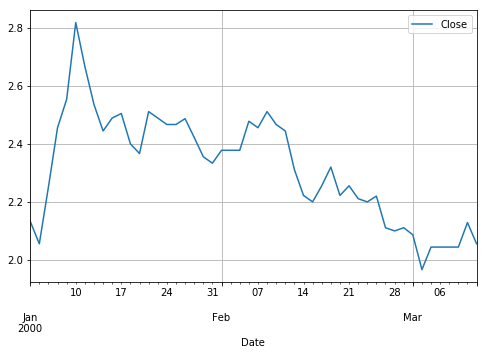

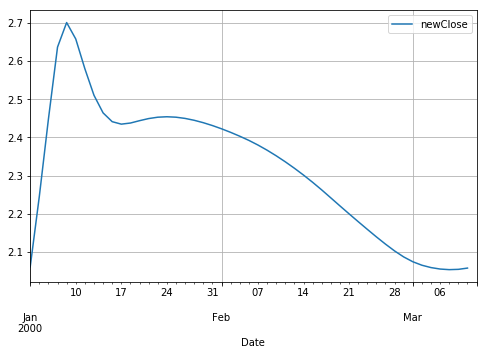

In [0]:
data = data.iloc[: 50, :]

data['newClose'] = serie
#print(data.Close)

data.plot(x='Date', y='Close', figsize=(8, 5))
plt.grid(True)


data.plot(x='Date', y='newClose', figsize=(8, 5))
plt.grid(True)